# Python Imports

In [1]:
import io
import os
import sys
import numpy as np
from PIL import Image
import pandas as pd
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output
import plotly.express as px

# Control Constants

In [2]:

WIDTH = 500
HEIGHT = 500
MARGIN = 50
RADIUS = 5

WHITE ='#FFFFFF'
RED = '#FF0000'
DARK_RED = '#660000'
GREEN = '#00FF00'
BLUE = '#0000FF'
BLACK =  '#000000'
BACKGROUND = 'rgba(50,205,50)'


In [3]:
LAYOUT = go.Layout(
    
    autosize=False,
    width=WIDTH+MARGIN,
    height=HEIGHT+MARGIN,
    plot_bgcolor=GREEN,
    paper_bgcolor=WHITE,
    margin=dict(l=MARGIN//2, r=MARGIN//2, t=MARGIN//2, b=MARGIN//2)
)
MARKER_SETTINGS = dict(size=RADIUS, color=RED, line=dict(width=2, color=RED))
print(LAYOUT)
print("Marker Settings: {}".format(MARKER_SETTINGS))

Layout({
    'autosize': False,
    'height': 550,
    'margin': {'b': 25, 'l': 25, 'r': 25, 't': 25},
    'paper_bgcolor': '#FFFFFF',
    'plot_bgcolor': '#00FF00',
    'width': 550
})
Marker Settings: {'size': 5, 'color': '#FF0000', 'line': {'width': 2, 'color': '#FF0000'}}


In [5]:
def plotly_fig2array(fig):
    fig_bytes = fig.to_image(format='png')
    buffer = io.BytesIO(fig_bytes)
    img = Image.open(buffer)
    return np.asarray(img)

def traceof(x, y):
    return go.Scatter(x=x, y=y, mode='markers', marker=MARKER_SETTINGS)

def lineof(x, y):
    return go.Scatter(x=x, y=y, mode='lines')

def figure(x, y):
    fig = go.Figure(layout=LAYOUT)
    fig.add_trace(traceof(x, y))
    return fig

def ImageOf(x, y):
    return Image.fromarray(plotly_fig2array(figure(x, y)))

def ImageDataOf(x, y):
    return plotly_fig2array(figure(x, y))


# Question One

Does the degree of correlation effect the number of samples needed to effectively display a linear trend in the data?


### Uniform Sampling Case

$$
p(x) = \frac{1}{b-a}
$$

### Normal Distribution

$$
p(x) = N(u, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\frac{(x - u)^2}{\sigma^2}}
$$

In [6]:
N = 10000
a, b = 0, 1
midpoint = (b - a) / 2

x_uniform, x_normal = np.random.uniform(a, b, N), np.random.normal(size=N)
y_uniform, y_normal = np.random.uniform(a, b, N), np.random.normal(size=N)


In [7]:
trace_xu_yu = go.Scatter(x=x_uniform, y=y_uniform, mode='markers', marker=MARKER_SETTINGS)
trace_xu_yn = go.Scatter(x=x_uniform, y=y_normal,  mode='markers', marker=MARKER_SETTINGS)
trace_xn_yu = go.Scatter(x=x_normal,  y=x_uniform,  mode='markers', marker=MARKER_SETTINGS)
trace_xn_yn = go.Scatter(x=x_normal,  y=y_normal,   mode='markers', marker=MARKER_SETTINGS)

R =  0.002401264337234699
Output Shape: (550, 550, 4)


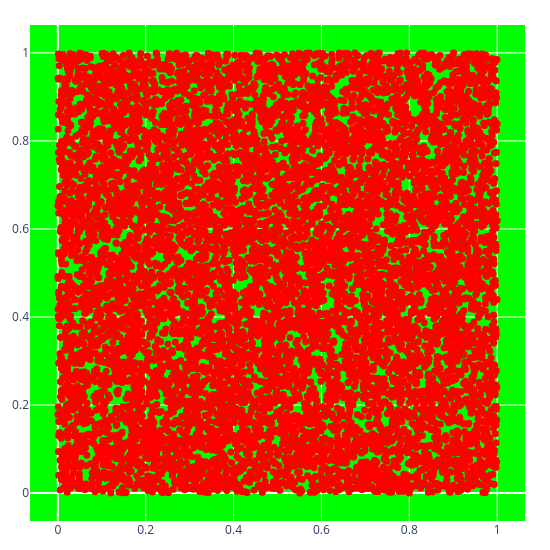

In [8]:
fig1 = go.Figure(layout=LAYOUT)
fig1.add_trace(trace_xu_yu)
xu_yu_img = plotly_fig2array(fig1)
print("R = ", np.corrcoef(x=x_uniform, y=y_uniform)[0, 1])
print("Output Shape: {}".format(xu_yu_img.shape))
Image.fromarray(xu_yu_img)

R =  -0.006996639893114921
Output Shape: (550, 550, 4)


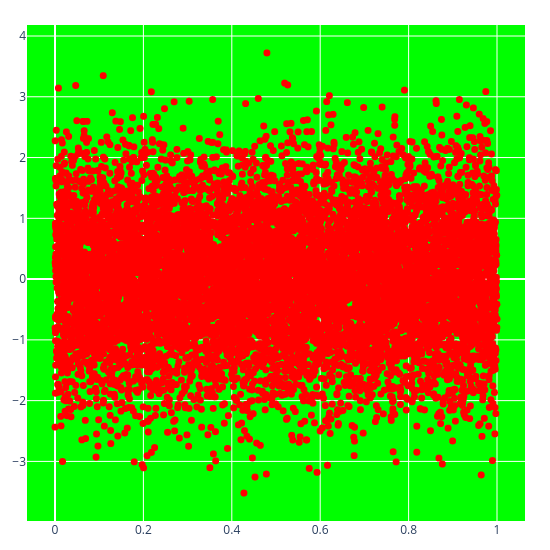

In [9]:
fig2 = go.Figure(layout=LAYOUT)
fig2.add_trace(trace_xu_yn)
xu_yn_img = plotly_fig2array(fig2)
print("R = ", np.corrcoef(x=x_uniform, y=y_normal)[0, 1])
print("Output Shape: {}".format(xu_yn_img.shape))
Image.fromarray(xu_yn_img)

R =  -0.008904154517808354
Output Shape:  (550, 550, 4)


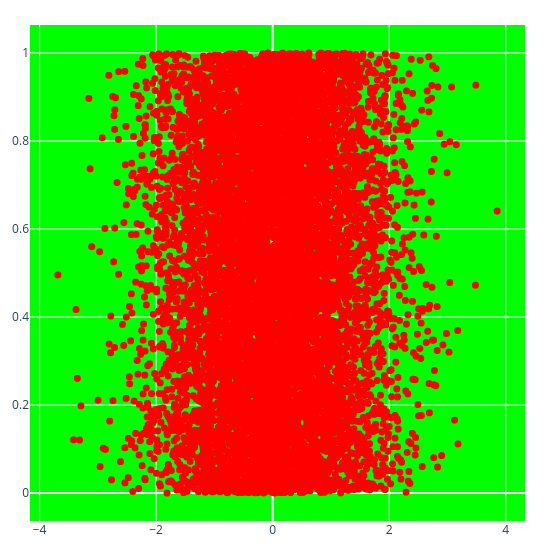

In [10]:
fig3 = go.Figure(layout=LAYOUT)
fig3.add_trace(trace_xn_yu)
xn_yu_img = plotly_fig2array(fig3)
print("R = ", np.corrcoef(x=x_normal, y=y_uniform)[0, 1])
print("Output Shape: ", xn_yu_img.shape)
Image.fromarray(xn_yu_img)

R =  0.003071937460633719
Output Shape:  (550, 550, 4)


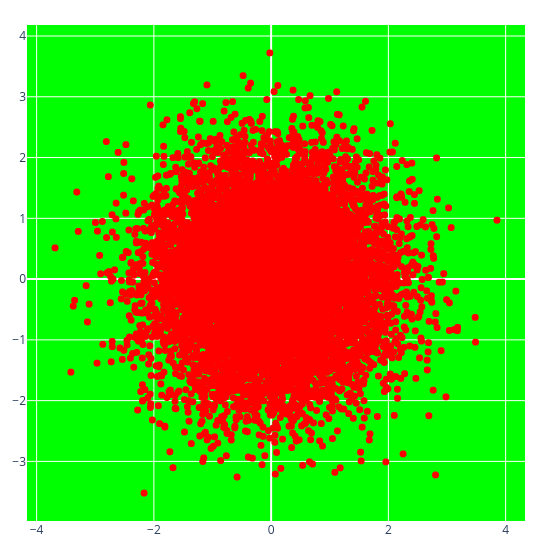

In [11]:
fig4 = go.Figure(layout=LAYOUT)
fig4.add_trace(trace_xn_yn)
xn_yn_img = plotly_fig2array(fig4)
print("R = ", np.corrcoef(x=x_normal, y=y_normal)[0, 1])
print("Output Shape: ", xn_yn_img.shape)
Image.fromarray(xn_yn_img)

Things to note. The correlatation between two vairables is the their shared percentage of shared determinants. For instance, smoking and lung cancer have a shared determinant of carcinogens which explains their observed correlation. So what the above plots are demonstrating is that independently operating distributions yield low correlation values.


A distribution or relation can take multiple arbitrary shapes. Note that a normal distribution is less sparse than a uniform distribution, it therefore consumes less 'space' then a uniform distribution.
For any dataset, there can be multiple distributions present. For a generic online sampler, we have no prior on what distribution will be observed. This is partly why uniform random sampling is so prevalent.

Let's take the persepctive of a data analyst looking to quick visaulize possible trends in the data. Assume the dataset is well over 1M data points so visualizaing all of them is impractical for interactive, exploratory uses.

1) What is the minimum number of samples needed to confidently capture a trend or conclude there is no trend in the data?

2) What is the number of samples needed in which updates to the plot yield no perceptable difference in final image?

Right now you have a generic Buffon Coin sampler which uses the parameters of the plot to specify an upper bound on the number of samples needed to display on a plot before overplotting occurs.

3) Can you this sampling methodolgy capture enough data to have a correlation or not?

### Question 1

Lets start simple. Assume there is a linear trend $y=x$. The variable $x$ is normally distributed with $y$ normally distributed from it.

R =  0.7076302776639922


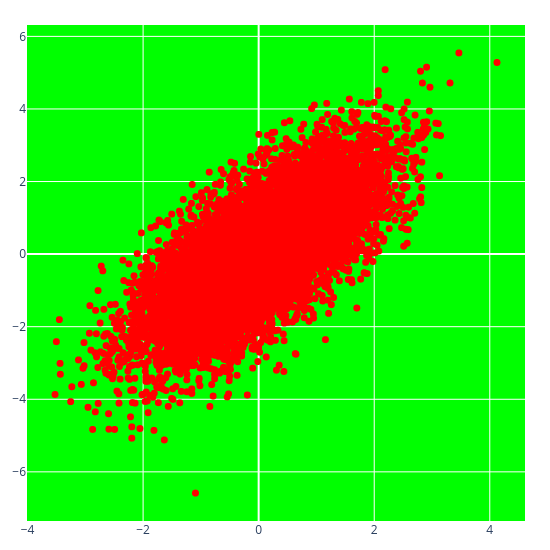

In [12]:
x = np.random.normal(size=10000)
y = x + np.random.normal(size=10000)

R = np.corrcoef(x, y)
print("R = ", R[0][1])


img, img_data = ImageOf(x, y), ImageDataOf(x, y)
img

Ok. We have the expected clustering in the center (Normal Distribution is taking up less space than Uniform). We also have the true correlation $r$. Lets observe how the correlation changes as we randomly sample from the data.

In [13]:
data = np.concatenate((x[None, :].T, y[None, :].T), axis=1)
sample_rates = (np.arange(0.01, 1.01, step=0.01) * len(data)).astype(np.int32)
print(sample_rates)


[  100   200   300   400   500   600   699   800   900   999  1100  1200
  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300  2400
  2500  2600  2700  2800  2900  3000  3100  3200  3300  3400  3500  3600
  3700  3800  3900  4000  4100  4200  4300  4400  4500  4600  4700  4800
  4900  5000  5100  5200  5300  5400  5500  5600  5700  5800  5900  6000
  6100  6200  6300  6400  6500  6600  6700  6800  6900  7000  7100  7200
  7300  7400  7500  7600  7700  7800  7900  8000  8100  8200  8300  8400
  8500  8600  8700  8800  8900  9000  9100  9200  9300  9400  9500  9600
  9700  9800  9900 10000]


A note on this sample rate. It scales with the population size. Might be worth exploring how to update sampling rates to be smaller increments in extreeme cases.

In [14]:
def correlations_over_samples(data, sample_rates):
    correlations = []
    for k in sample_rates:
        indices = np.random.permutation(k)
        correlation = np.corrcoef(x=data[indices, 0], y=data[indices, 1])[0, 1]
        correlations.append(correlation)
    return np.array(correlations)

In [15]:
r_values = correlations_over_samples(data, sample_rates)

In [16]:
line_fig = go.Figure(lineof(x=sample_rates, y=r_values))
line_fig

Ok. So now we know how the correlation is evolving over time for this simulated dataset. How does the difference in image quality change over sample rates?

Image quality is subjective. Human judgement is a HIGHLY imprecise as a measuring device. For now, use simple objective functions such as Euclidean distance to measure the differneces in images over time. It would also be helpful to have a ground truth image score as well at all times.


It would be cool if we could implement some sort of metric closely related to Visualization Aware Sampling (VAS) to meaure image quality since. VAS can imploy the property of locality and has been correlated with user studies. (Though I am always doubtful of the representativeness of the user studies in the HCI community.)


Also note, the beginning of the correlation curve is very noisy (normally distributed around the ideal correlation value). It might be worth representing this with a heat map distribution at the beginning.

Also note, it might be worth considering only the most outlying point on this correlation curve or any such curve.

### Candidate Metric Functions

#### L1 and L2 Norms

In [73]:
def norm(x: np.array, y: np.array, p=2):
    if x.shape != y.shape:
        raise ValueError("Mismatch Input Element Shape. X-Shape: {} != Y-Shape: {}", x.shape, y.shape)
    if p != 1 and p != 2:
        raise ValueError("Only Support L1 and L2 Norms. Input p = {}", p)
    return np.sqrt((np.sum(np.abs(x - y)**p)))

class Normal:
    def __init__(self, p=2):
        self.p = p

    def __call__(self, x: np.array, y: np.array):
        return norm(x=x, y=y, p=self.p)

#### Analysis

Shape Of Image Data:  (550, 550, 4)


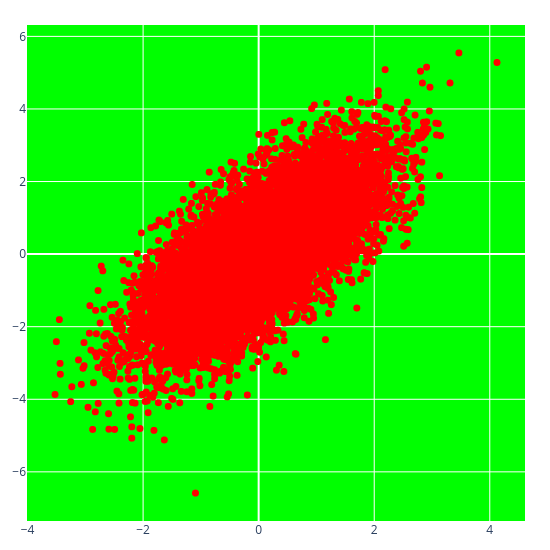

In [18]:
print("Shape Of Image Data: ", img_data.shape)
img

In [112]:
def scores_over_samples(data, sample_rates, metric):

    target_image_data = ImageDataOf(x=data[:, 0], y=data[:, 1])

    correlations, image_diffs, images = [], [], []
    for k in sample_rates:

        print("Generating Scores For Sample Size: {} of {} ...".format(k, len(data)))

        indices = np.random.permutation(len(data))[:k]
        x_sample, y_sample = data[indices, 0], data[indices, 1]
        
        R = np.corrcoef(x=x_sample, y=y_sample)
        correlations.append(R[0, 1])

        sample_image_data = ImageDataOf(x=x_sample, y=y_sample)
        image_diffs.append(metric(sample_image_data, target_image_data))

        images.append(Image.fromarray(sample_image_data))


    return np.array(correlations), np.array(image_diffs), images

In [126]:
norm_op = Normal(p=2)
reduced_sample_rates = [100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000, len(data)]
r_scores, img_scores, scatter_plot_images = scores_over_samples(data, sample_rates=reduced_sample_rates, metric=norm)

Generating Scores For Sample Size: 100 of 10000 ...
Generating Scores For Sample Size: 200 of 10000 ...
Generating Scores For Sample Size: 300 of 10000 ...
Generating Scores For Sample Size: 500 of 10000 ...
Generating Scores For Sample Size: 1000 of 10000 ...
Generating Scores For Sample Size: 2000 of 10000 ...
Generating Scores For Sample Size: 3000 of 10000 ...
Generating Scores For Sample Size: 4000 of 10000 ...
Generating Scores For Sample Size: 5000 of 10000 ...
Generating Scores For Sample Size: 10000 of 10000 ...


In [127]:
r_scores

array([0.70767684, 0.73440207, 0.74654928, 0.67413299, 0.69022615,
       0.71090547, 0.71135534, 0.70363994, 0.71645638, 0.70763028])

In [128]:
img_scores

array([2173.54065985, 2098.07006556, 2118.52212639, 2316.8338309 ,
       2492.57517439, 2330.80372404, 1685.24478934, 2211.13816846,
       1914.34584127,   14.69693846])

In [129]:
r_line = go.Figure(lineof(x=reduced_sample_rates, y=r_scores))
distance_line = go.Figure(lineof(x=reduced_sample_rates, y=img_scores))

In [130]:
r_line

In [131]:
distance_line

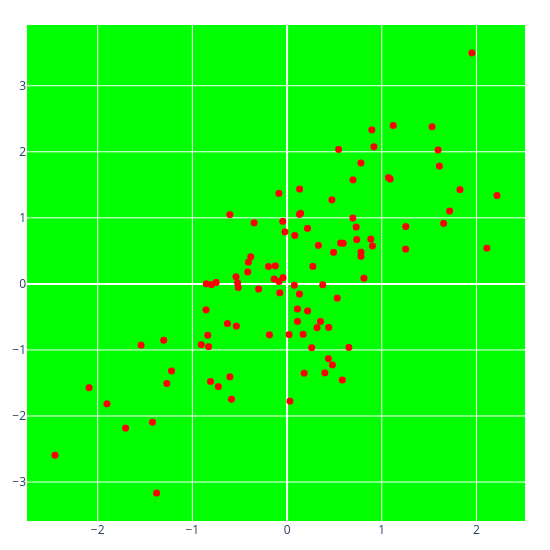

In [132]:
scatter_plot_images[0]

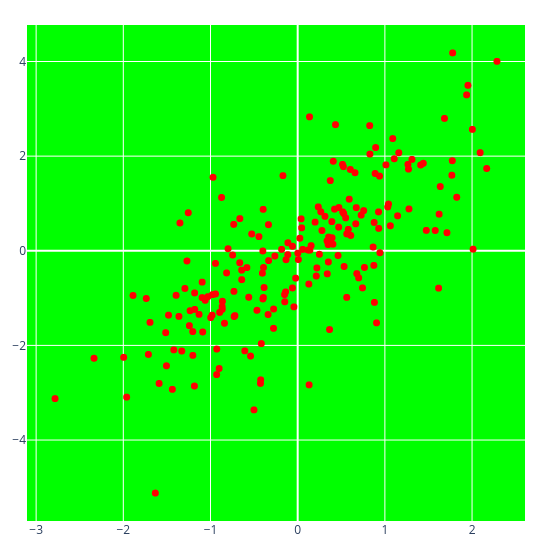

In [133]:
scatter_plot_images[1]

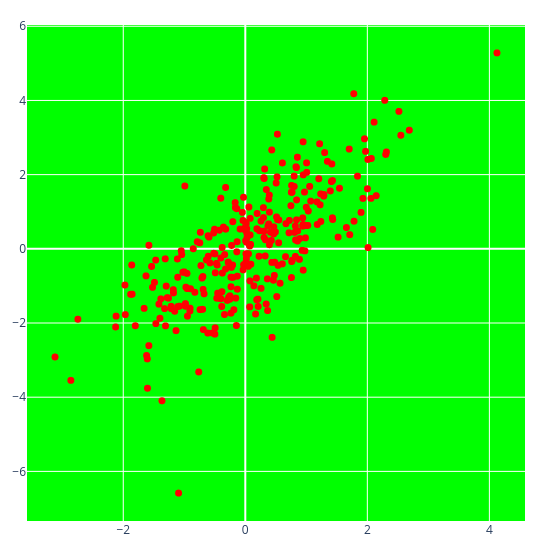

In [134]:
scatter_plot_images[2]

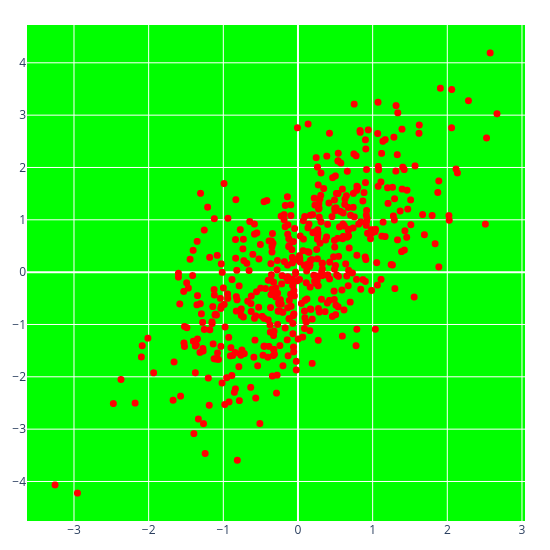

In [135]:
scatter_plot_images[3]

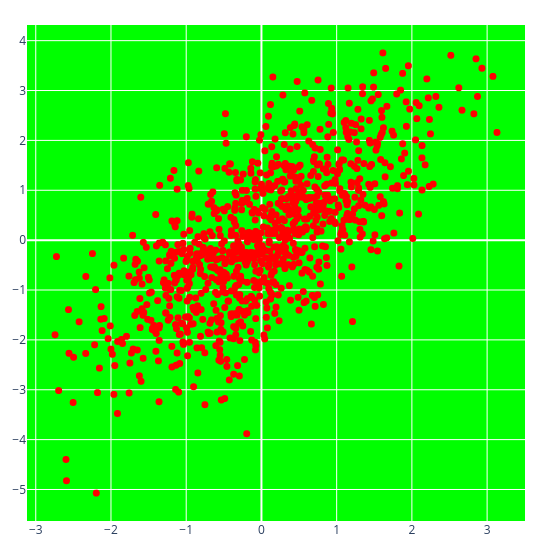

In [136]:
scatter_plot_images[4]

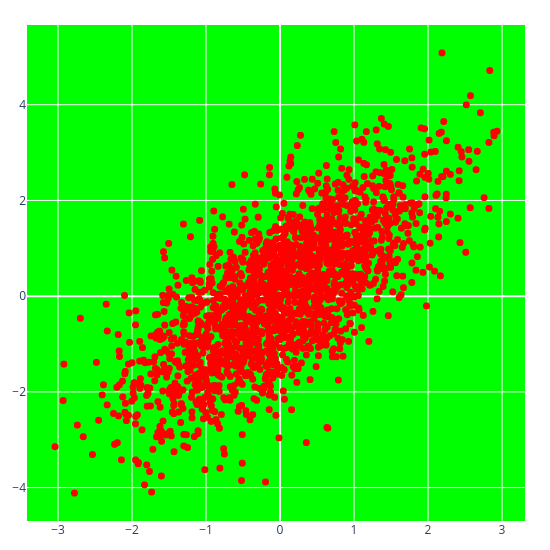

In [137]:
scatter_plot_images[5]

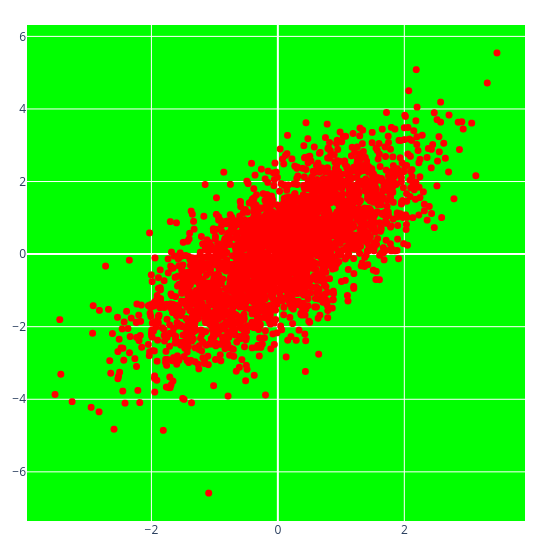

In [138]:
scatter_plot_images[6]

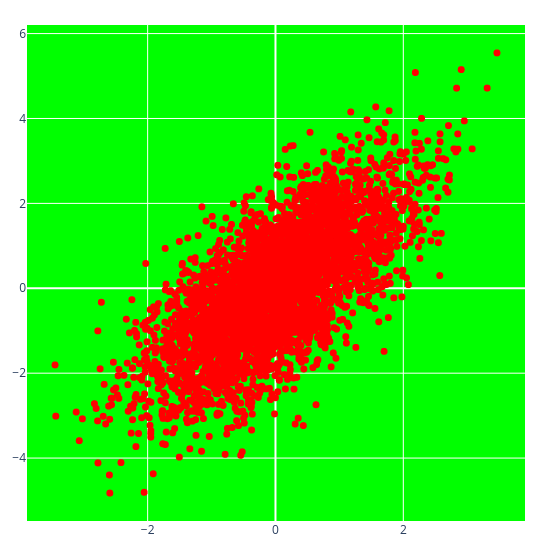

In [139]:
scatter_plot_images[7]

#### Thoughts

How much would the score improve if you catured the outliers first for the above linear trend? This should at least get the scales right, I think.... :)

What does it mean to be an outlier? (MacroBase and other literature might have relavent insights here.) In this case, we could state that the points farthest from the center our outliers.
This kind of leads to the question of how to embed distance data into an arbitrary dataset. How do we project tabular data onto the 2D plane? Can that meta data be incorporated into an online data stream?
Instead of caputring outliers, maybe we should omit them?

For now, lets use our knowledge about this graph and cheat. We will test including the 50 most extreeme (farthest distance from the center and see how that affects the distance scores) and
exlude them and see how it effects the Euclidean distance bewteen the images. Including outliers at the expense of more representative data may create an unacceptable shift in correlation.

Even if you do include the outliers as priorities, does that help or hurt the analyst in the end? Remember, they are not really (should not be) interested in the absolute image quality. They
simply need a reliable correlation which safices for exploratory analysis.

Can we generate a distance metric on images that is correlated with the observed correlation in the graph?

##### Capture 50 Outliers

In [110]:
def select_outliers(data, k=50):
    return data[np.argsort(np.linalg.norm(data, axis=1))[-k:], :]

In [151]:
def scores_over_samples_outliers(data, sample_rates, metric):

    target_image_data = ImageDataOf(x=data[:, 0], y=data[:, 1])

    correlations, image_diffs, images = [], [], []
    outlier_indices = np.argsort(np.linalg.norm(data, axis=1))[-50:]
    outliers, inliers = np.take(data, outlier_indices, axis=0), np.delete(data, outlier_indices, axis=0)

    for k in sample_rates:

        print("Generating Scores For Sample Size: {} of {} ...".format(k, len(data)))

        indices = np.random.permutation(len(inliers))[:k]
        x_sample = np.concatenate((outliers[:, 0], inliers[indices, 0]))
        y_sample = np.concatenate((outliers[:, 1], inliers[indices, 0]))
        
        
        R = np.corrcoef(x=x_sample, y=y_sample)
        correlations.append(R[0, 1])

        sample_image_data = ImageDataOf(x=x_sample, y=y_sample)
        image_diffs.append(metric(sample_image_data, target_image_data))

        images.append(Image.fromarray(sample_image_data))


    return np.array(correlations), np.array(image_diffs), images

In [152]:
norm_op = Normal(p=2)
reduced_sample_rates = [100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000, len(data)]
r_scores_outliers, img_scores_outliers, scatter_plot_images_outliers = scores_over_samples_outliers(data, sample_rates=reduced_sample_rates, metric=norm)

Generating Scores For Sample Size: 100 of 10000 ...
Generating Scores For Sample Size: 200 of 10000 ...
Generating Scores For Sample Size: 300 of 10000 ...
Generating Scores For Sample Size: 500 of 10000 ...
Generating Scores For Sample Size: 1000 of 10000 ...
Generating Scores For Sample Size: 2000 of 10000 ...
Generating Scores For Sample Size: 3000 of 10000 ...
Generating Scores For Sample Size: 4000 of 10000 ...
Generating Scores For Sample Size: 5000 of 10000 ...
Generating Scores For Sample Size: 10000 of 10000 ...


In [150]:
r_scores_outliers

array([0.94663033, 0.94380707, 0.94390831, 0.94597298, 0.95565547,
       0.96778851, 0.97554713, 0.98002692, 0.98359553, 0.99068966])

In [ ]:
r_line_outlier = go.Figure(lineof(x=reduced_sample_rates, y=r_scores))
distance_line_outlier = go.Figure(lineof(x=reduced_sample_rates, y=img_scores))